In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [ ]:
# 1. For admission :
# 1. All cause admission left join:
path = '/home/daisy/FDA_Dataset/inpatient_all_final_1.csv'
inpatient_ad_train_1 = pd.read_csv(path).iloc[:,1:]

# 2. All cause admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_all_final_2.csv'
inpatient_ad_train_2 = pd.read_csv(path).iloc[:,1:]

# 3. CVD admission left join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_1.csv'
inpatient_ad_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# 4. CVD admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_2.csv'
inpatient_ad_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

# 2. For CVD mortality	
# left join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_1.csv'
inpatient_mortality_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_2.csv'
inpatient_mortality_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

#3. For all cause mortality
# left join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_1.csv'
inpatient_mortality_all_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_2.csv'
inpatient_mortality_all_train_2 = pd.read_csv(path).iloc[:,1:]

In [3]:
inpatient_ad_train_1

inpatient_ad_cvd_train_1
    
inpatient_mortality_cvd_train_1

inpatient_mortality_all_train_1

## Feature selection 

### Tree based feature selection and random forest classification

the higher, the more important the feature. 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

/tmp/ipykernel_213691/2085627819.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X_train_ad,y_train_ad)


Feature ranking:


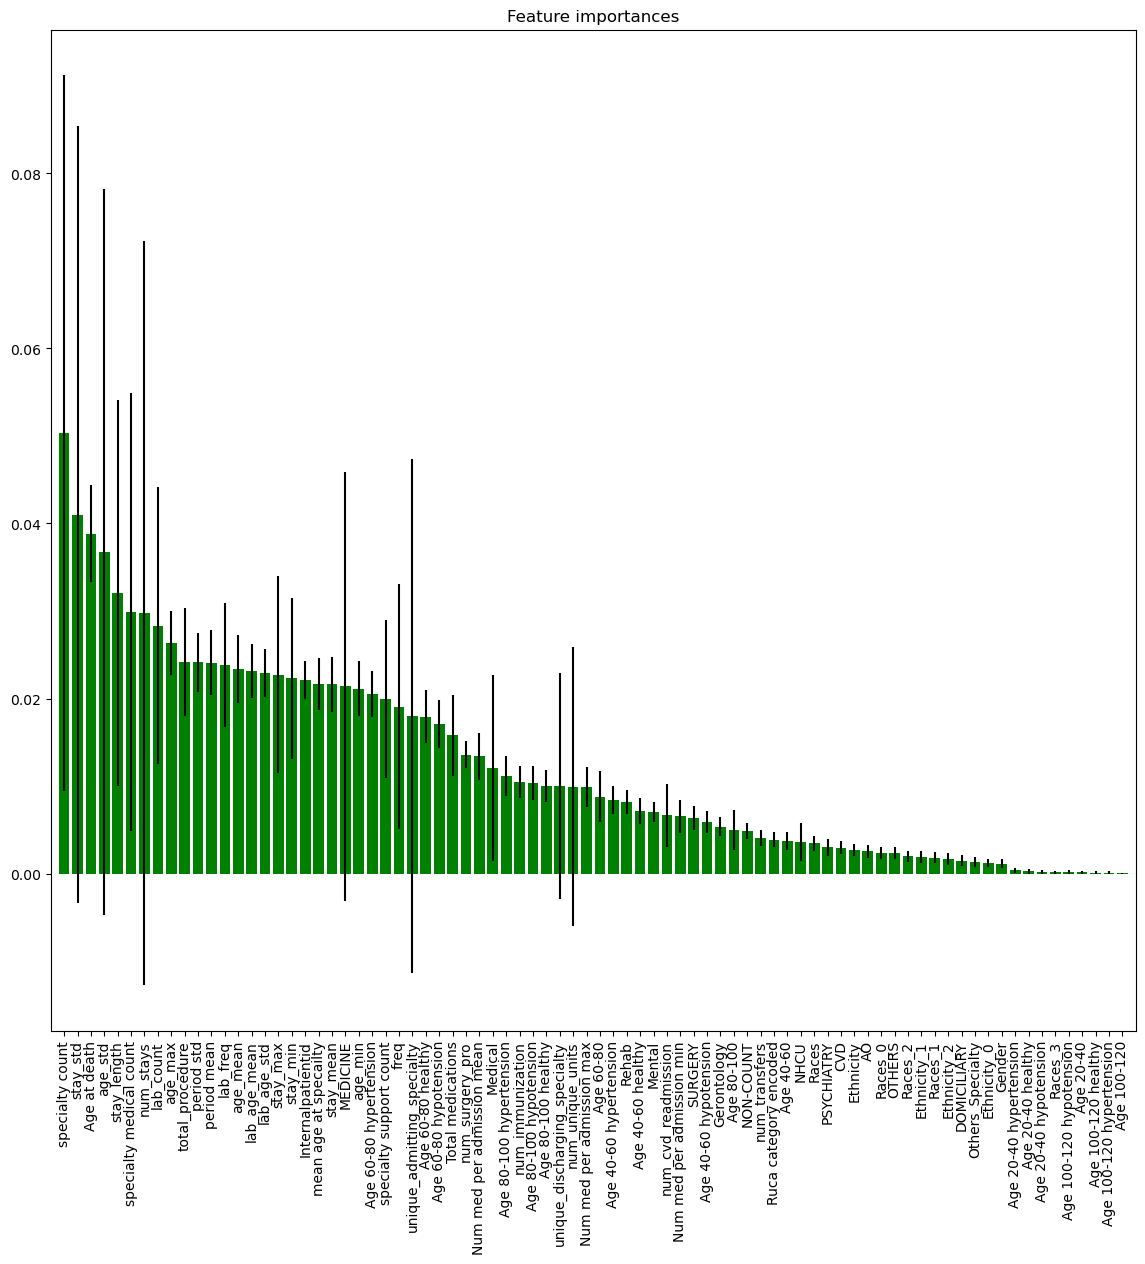

In [21]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X,y)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

#for i in range(X.shape[1]):
#    print(i, X.columns[indices[i]], importances[indices[i]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

score_list_ad_rf = zip(X.columns[indices], importances[indices])
features_to_keep_ad_rf = [name for name,score in score_list_ad_rf]

/tmp/ipykernel_213691/2980664015.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X_train_mor,y_train_mor)


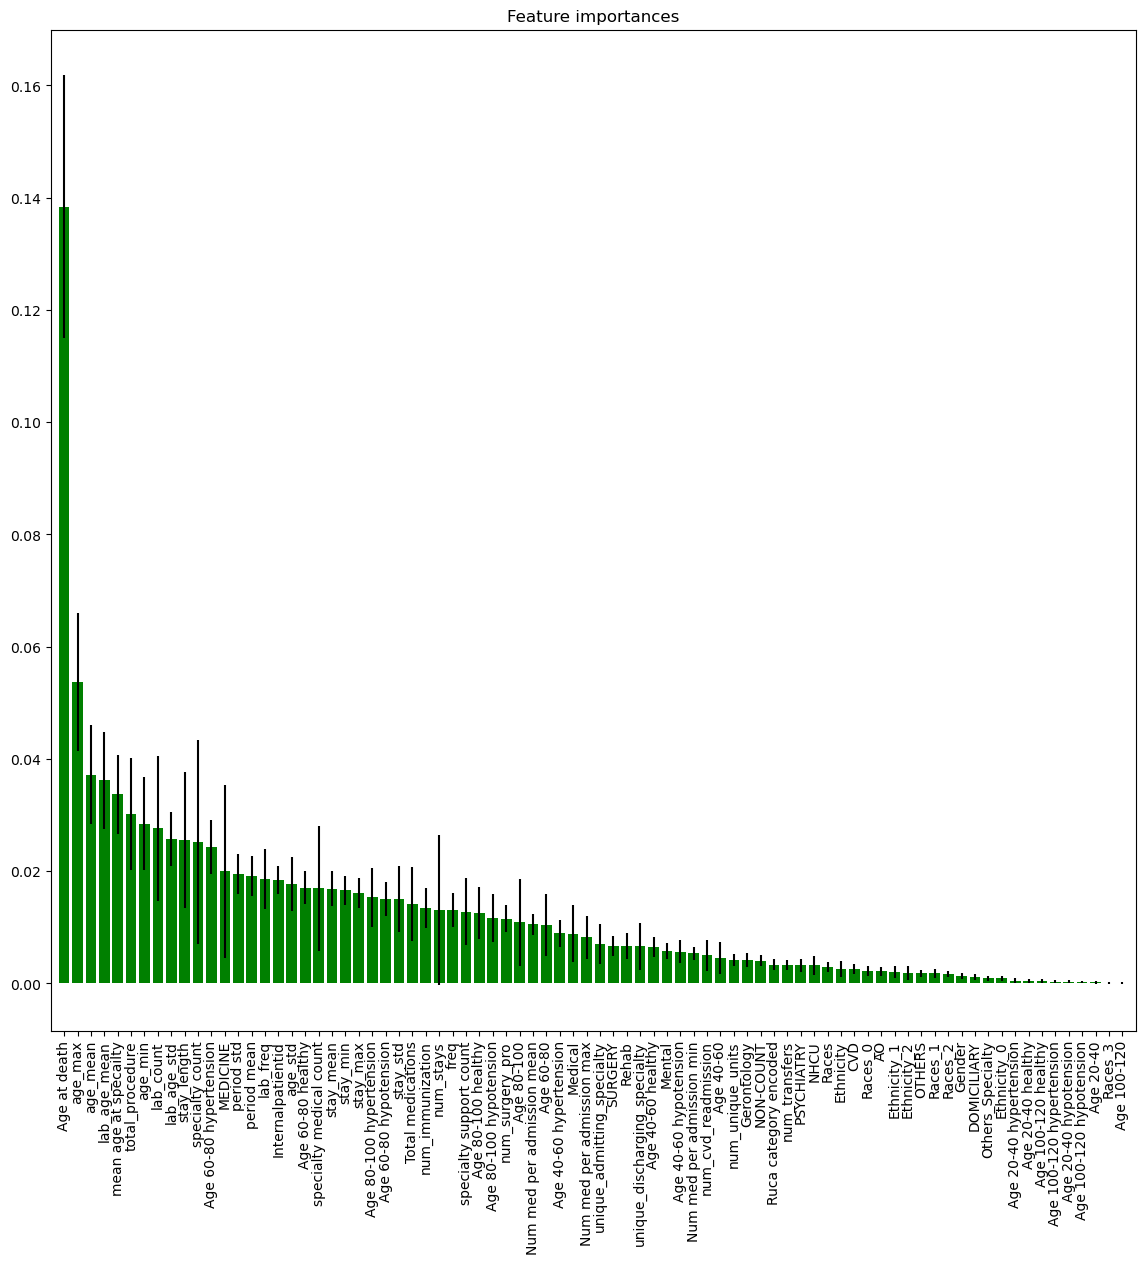

In [22]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X,y)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#print("Feature ranking:")

#for i in range(X.shape[1]):
#    print(i, X.columns[indices[i]], importances[indices[i]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

score_list_mor_rf = zip(X.columns[indices], importances[indices])
features_to_keep_mor_rf = [name for name,score in score_list_mor_rf]

## PCA

Text(0, 0.5, 'explained variance ratio')

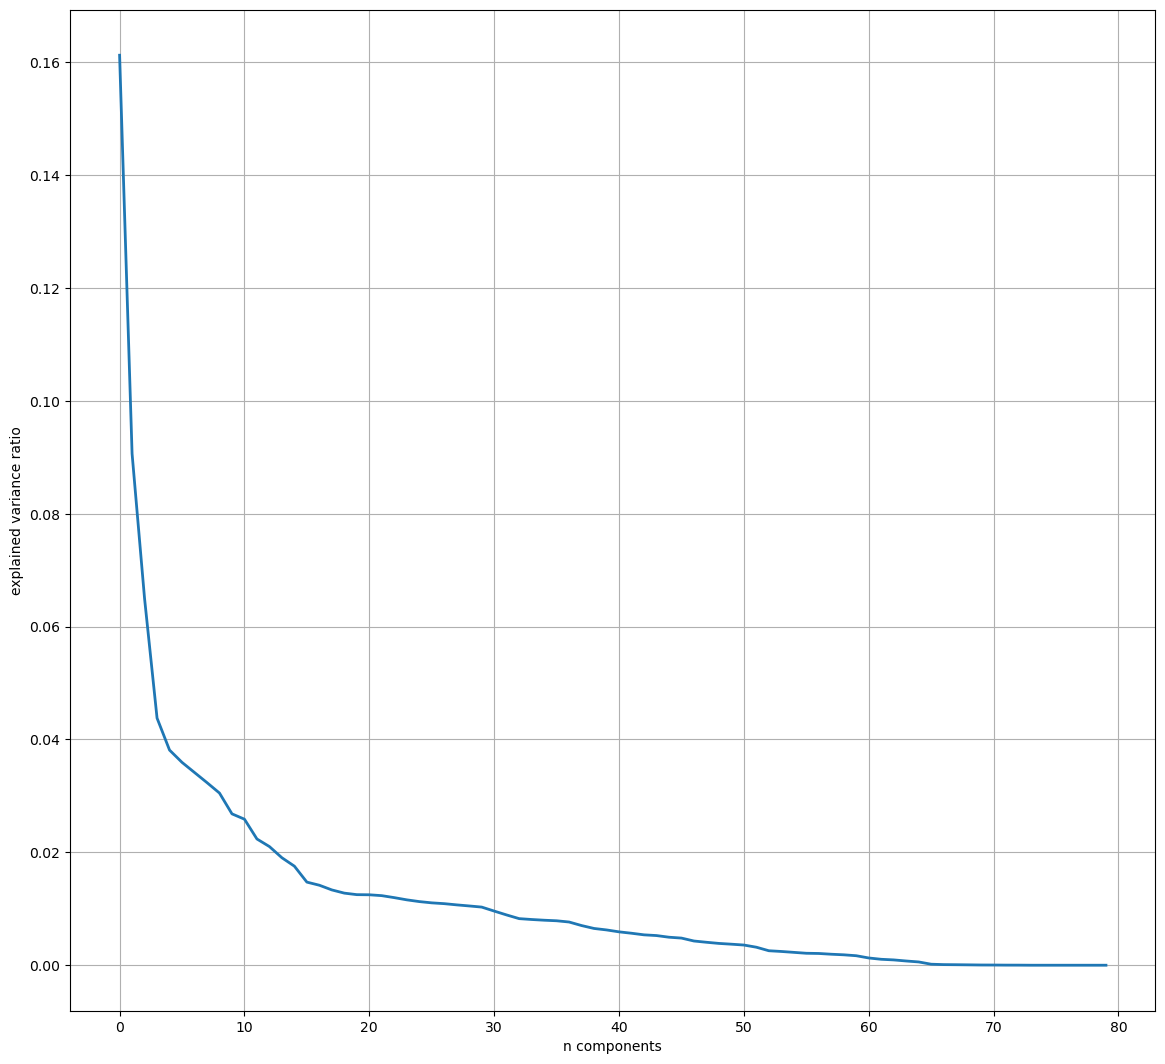

In [12]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca = PCA() 
pca.fit(X_sc)

plt.figure(1, figsize=(14, 13))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('n components')
plt.ylabel('explained variance ratio')

### Principle component analysis (PCA)

Fundemental dimension reduction technique

first step is decorrelation:

rotates data samples to be aligned with axes
shifts data asmples so they have mean zero
no information lost

fit() : learn how to shift samples

transform(): apply the learned transformation. It can also be applies test data

Resulting PCA features are not linearly correlated

Principle components: directions of variance

Text(0, 0.5, 'explained variance ratio')

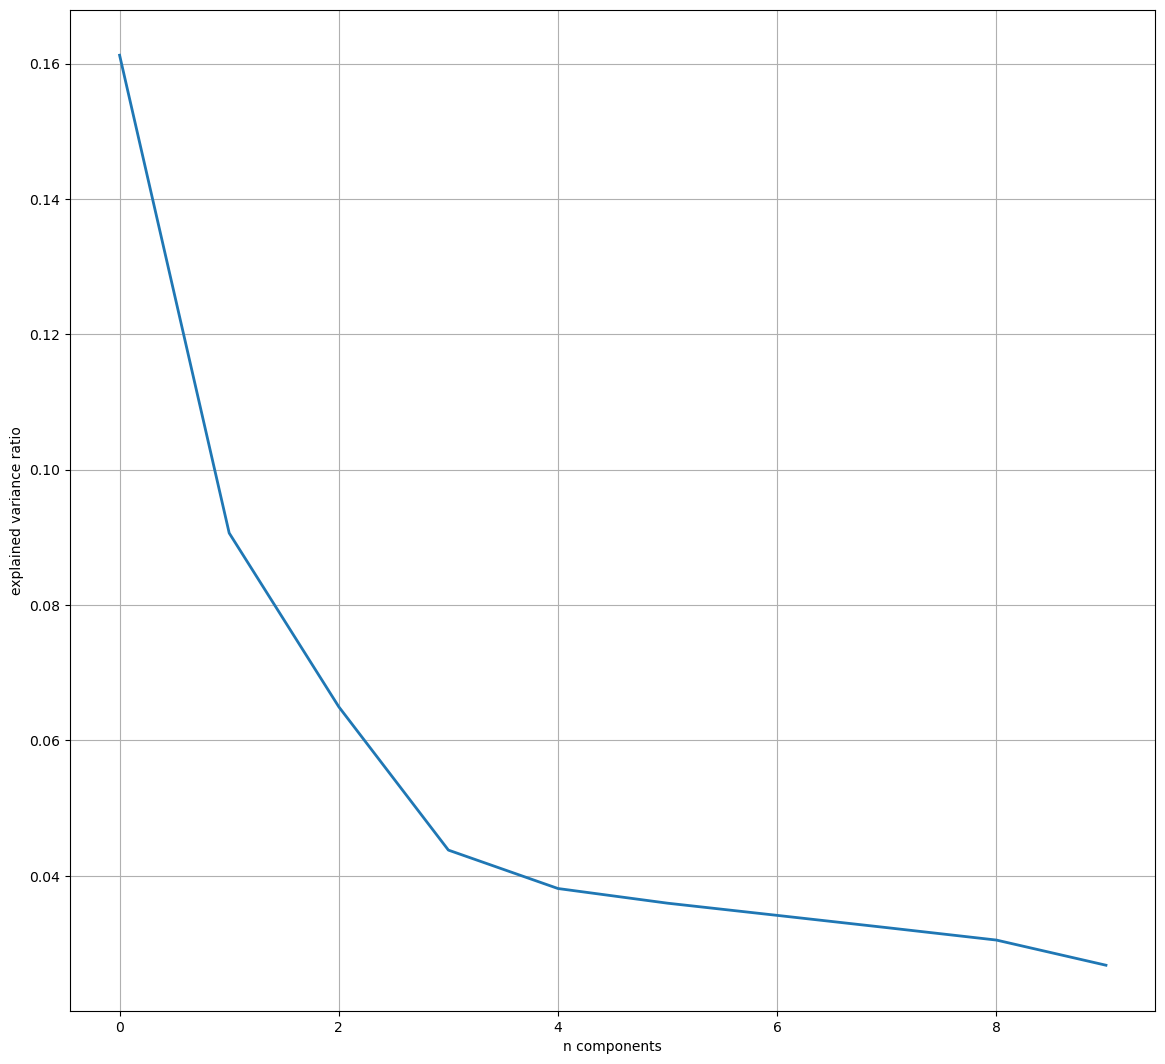

In [20]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca_mor = PCA() 
pca_mor.fit(X_sc)

plt.figure(1, figsize=(14, 13))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('n components')
# How much each feature impacts the prediction
plt.ylabel('explained variance ratio')

In [22]:
pca_mor = PCA(10) 
pca_mor.fit(X_sc)
# The components are sorted by decreasing explained_variance_.
n_pcs= pca_mor.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_mor.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,specialty count
1,PC1,age_max
2,PC2,stay_mean
3,PC3,Ethnicity_2
4,PC4,Age 20-40 healthy
5,PC5,Age 100-120 hypotension
6,PC6,Races
7,PC7,Age 40-60 healthy
8,PC8,Races_2
9,PC9,stay_min


Text(0, 0.5, 'explained variance ratio')

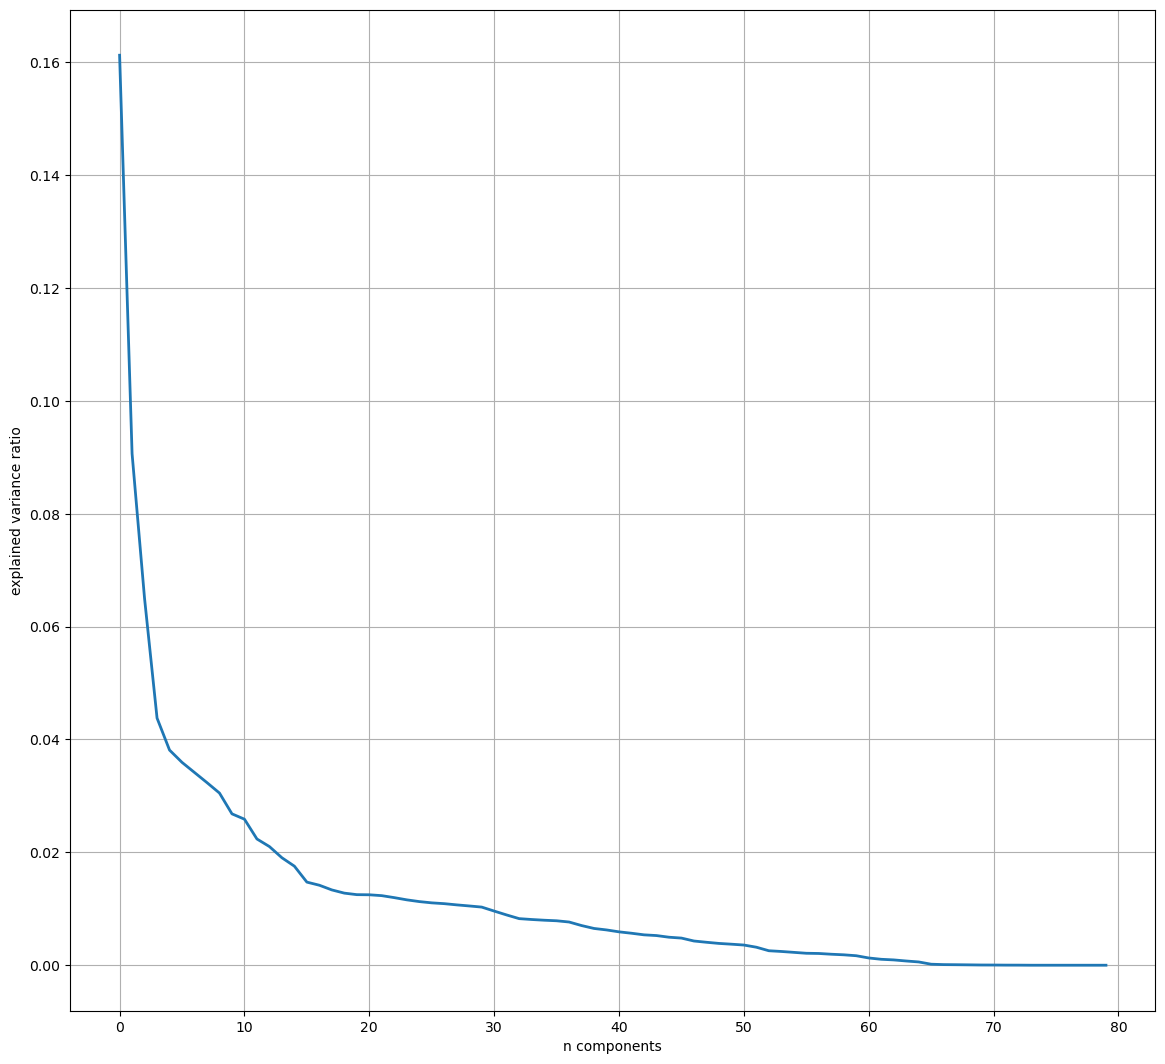

In [15]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# Number of components to keep. if n_components is not set all components are kept:
pca_ad = PCA() 
pca_ad.fit(X_sc)

plt.figure(1, figsize=(14, 13))
plt.plot(pca_ad.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.grid(True)
plt.xlabel('n components')
# How much each feature impacts the prediction
plt.ylabel('explained variance ratio')

In [16]:
# The components are sorted by decreasing explained_variance_.
n_pcs= pca_ad.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_ad.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,specialty count
1,PC1,age_max
2,PC2,stay_mean
3,PC3,Ethnicity_2
4,PC4,Age 20-40 healthy
...,...,...
75,PC75,Races_0
76,PC76,Races_2
77,PC77,Ethnicity_2
78,PC78,Ethnicity_0


In [17]:
pca = PCA(10) 
pca.fit(X_sc)
# The components are sorted by decreasing explained_variance_.
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,specialty count
1,PC1,age_max
2,PC2,stay_mean
3,PC3,Ethnicity_2
4,PC4,Age 20-40 healthy
5,PC5,Age 100-120 hypotension
6,PC6,Races
7,PC7,Age 40-60 healthy
8,PC8,Races_2
9,PC9,stay_std


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# find best scored 20 features
# chi2: score function
select_feature = SelectKBest(chi2, k=20).fit(X, y)
#print('Score list:', select_feature.scores_)
#print('Feature list:', X.columns)
score_df = pd.DataFrame({'Name':X.columns, 'Score':select_feature.scores_})
score_df.sort_values(by = 'Score').reset_index(drop =True)
score_list = list(zip(X.columns,select_feature.scores_))
score_list = sorted(score_list, key = lambda x: x[1],reverse=True)
features_to_keep_ad_bestk = [name for name,score in score_list]


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# find best scored 20 features
# chi2: score function
select_feature = SelectKBest(chi2, k=20).fit(X, y)
#print('Score list:', select_feature.scores_)
#print('Feature list:', X.columns)
#score_df = pd.DataFrame({'Name':X.columns, 'Score':select_feature.scores_})
#score_df.sort_values(by = 'Score').reset_index(drop =True)
#for id,(name,score) in enumerate(zip(X.columns,select_feature.scores_)):
#    print(id,(name,score))

score_list = list(zip(X.columns,select_feature.scores_))
score_list = sorted(score_list, key = lambda x: x[1],reverse=True)
features_to_keep_mor_bestk = [name for name,score in score_list]

In [26]:
set(features_to_keep_ad_rf[:20]).intersection(features_to_keep_ad_bestk[:20])

{'Internalpatientid',
 'lab_count',
 'lab_freq',
 'specialty count',
 'specialty medical count',
 'stay_length',
 'stay_max',
 'stay_min',
 'stay_std',
 'total_procedure'}

In [27]:
set(features_to_keep_mor_rf[:20]).intersection(features_to_keep_mor_bestk[:20])

{'Age 60-80 healthy',
 'Age 60-80 hypertension',
 'MEDICINE',
 'lab_count',
 'lab_freq',
 'specialty count',
 'specialty medical count',
 'stay_length',
 'total_procedure'}